# Topic Modelling Of News Articles

In [2]:
#importing pandas
import pandas as pd

# Loading the  dataset and reading the excel file 
df = pd.read_csv("C:/Users/HP/OneDrive/Desktop/Articles.csv", encoding='latin1')
print(df.head(10))

                                             Article       Date  \
0  KARACHI: The Sindh government has decided to b...   1/1/2015   
1  HONG KONG: Asian markets started 2015 on an up...   1/2/2015   
2  HONG KONG:  Hong Kong shares opened 0.66 perce...   1/5/2015   
3  HONG KONG: Asian markets tumbled Tuesday follo...   1/6/2015   
4  NEW YORK: US oil prices Monday slipped below $...   1/6/2015   
5  New York: Oil prices tumbled Tuesday to fresh ...   1/7/2015   
6  KARACHI: Strong bulls on Friday pulled the ben...   1/9/2015   
7  Singapore: Oil fell further in Asia Monday, wi...  1/12/2015   
8  KARACHI: Wholesale market rates for sugar drop...  1/13/2015   
9  SYDNEY: Oil prices fell 1 percent on Wednesday...  1/14/2015   

                                             Heading  NewsType  
0  sindh govt decides to cut public transport far...  business  
1                    asia stocks up in new year trad  business  
2           hong kong stocks open 0.66 percent lower  business  
3 

In [3]:
#importing neccesary libraries 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import defaultdict

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
#preprocessing of the data by performing basic text processing operations

# Tokenization and preprocessing function
def preprocess_text(text):
    # Tokenize text
    tokens = word_tokenize(text.lower())
    
    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.isalnum() and token not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

# Apply preprocessing to the article headings
df['cleaned_text'] = df['Heading'].apply(preprocess_text)
print(df.cleaned_text)


0       [sindh, govt, decides, cut, public, transport,...
1                          [asia, stock, new, year, trad]
2               [hong, kong, stock, open, percent, lower]
3            [asian, stock, sink, euro, near, nine, year]
4                         [u, oil, price, slip, 50, barr]
                              ...                        
2687    [laptop, ban, hit, dubai, 11m, weekend, travel...
2688    [pak, china, relation, third, country, shaukat...
2689            [uber, ground, self, driving, car, accid]
2690    [new, development, bank, plan, joint, investme...
2691    [google, powered, startup, weekend, energizing...
Name: cleaned_text, Length: 2692, dtype: object


In [10]:
from gensim import corpora, models

# Creating dictionary and document-term matrix
dictionary = corpora.Dictionary(df['cleaned_text'])
corpus = [dictionary.doc2bow(text) for text in df['cleaned_text']]

# Training LDA model
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Getting topics with top words
topics = lda_model.show_topics(num_topics=5, num_words=10, formatted=False)
print("Topics:")
for topic in topics:
    print(f"Topic {topic[0]}: ", [word[0] for word in topic[1]])


Topics:
Topic 0:  ['pakistan', 'china', 'trump', 'lord', 'say', 'bn', 'investment', 'day', 'chinese', 'world']
Topic 1:  ['oil', 'price', 'u', 'stock', 'asia', 'opec', 'dollar', 'asian', 'hit', 'pakistan']
Topic 2:  ['pakistan', 'india', 'head', 'say', 'dar', '2016', 'pcb', 'one', 'time', 'messi']
Topic 3:  ['euro', 'r', '2016', 'portugal', 'tax', 'ronaldo', 'price', 'england', 'france', 'pakistan']
Topic 4:  ['england', 'pakistan', 'india', 'win', 'sri', 'world', 'lanka', 't20', 'amir', 'australia']


In [11]:
from gensim.models import LdaModel

# Training the   LDA model
num_topics = 10  # Number of topics to discover
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Printing the  topics with top words
for idx, topic in lda_model.print_topics():
    print(f"Topic {idx+1}: {topic}")

# Optionally, visualize topics
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

Topic 1: 0.023*"pakistan" + 0.020*"stock" + 0.010*"open" + 0.010*"england" + 0.009*"pakistani" + 0.009*"tokyo" + 0.008*"india" + 0.008*"root" + 0.008*"rio" + 0.007*"first"
Topic 2: 0.045*"england" + 0.034*"pakistan" + 0.034*"sri" + 0.025*"new" + 0.024*"lanka" + 0.016*"world" + 0.016*"india" + 0.015*"t20" + 0.012*"zealand" + 0.011*"beat"
Topic 3: 0.018*"u" + 0.015*"global" + 0.015*"trade" + 0.011*"pakistan" + 0.010*"stock" + 0.010*"bowl" + 0.010*"asia" + 0.009*"china" + 0.009*"car" + 0.008*"olympi"
Topic 4: 0.052*"oil" + 0.033*"price" + 0.023*"u" + 0.020*"2016" + 0.018*"euro" + 0.014*"dollar" + 0.013*"opec" + 0.012*"hit" + 0.011*"year" + 0.011*"fi"
Topic 5: 0.025*"world" + 0.020*"trump" + 0.014*"win" + 0.013*"top" + 0.012*"take" + 0.010*"woman" + 0.009*"chinese" + 0.009*"england" + 0.009*"say" + 0.008*"aussie"
Topic 6: 0.031*"china" + 0.014*"saudi" + 0.013*"company" + 0.011*"approves" + 0.010*"paki" + 0.010*"project" + 0.010*"pakistan" + 0.009*"investment" + 0.009*"minister" + 0.008*"br

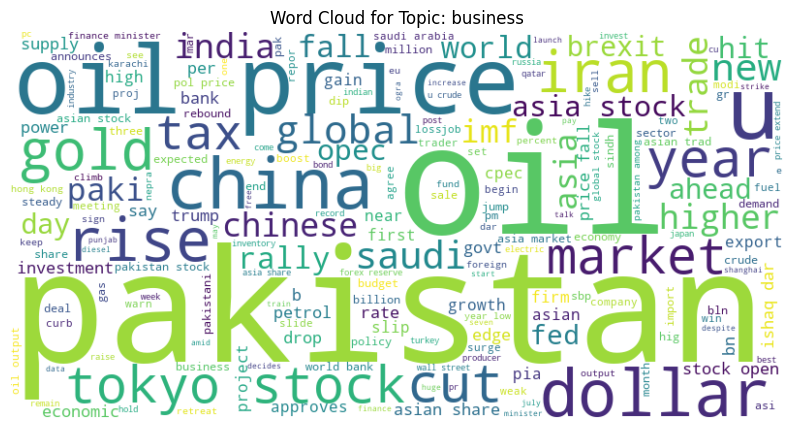

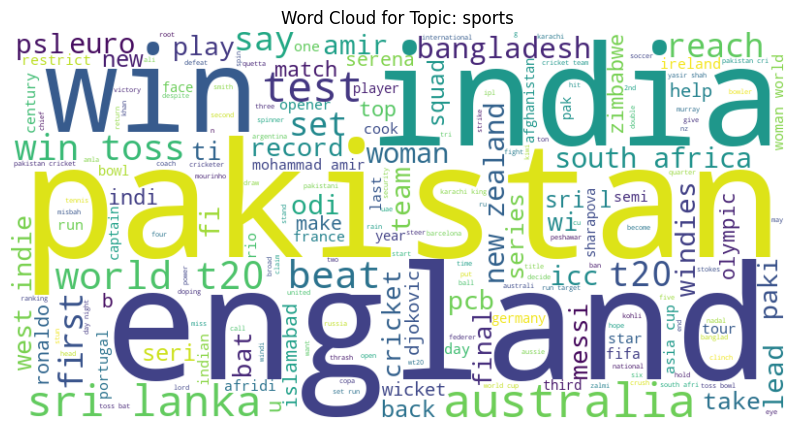

In [12]:
#preparing word cloud forsports and business 
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Grouping  article headings by topic
topic_texts = defaultdict(list)
for idx, row in df.iterrows():
    topic_texts[row['NewsType']].extend(row['cleaned_text'])

# Generating  word cloud for each topic
for topic, texts in topic_texts.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(texts))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Topic: {topic}')
    plt.axis('off')
    plt.show()


In [15]:
import matplotlib.pyplot as plt

# Converting 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Filtering data for 'business' and 'sports' news types
business_data = df[df['NewsType'] == 'business']
sports_data = df[df['NewsType'] == 'sports']




In [16]:
# Count occurrences by date for 'business' and 'sports' news types
business_counts = business_data.groupby('Date').size()
sports_counts = sports_data.groupby('Date').size()


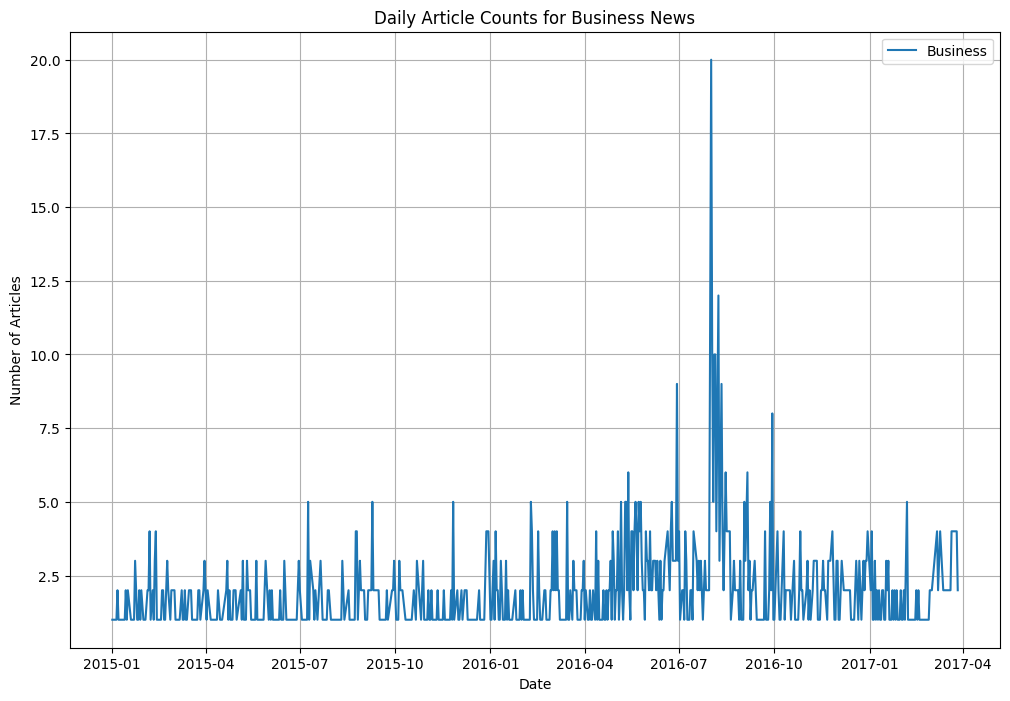

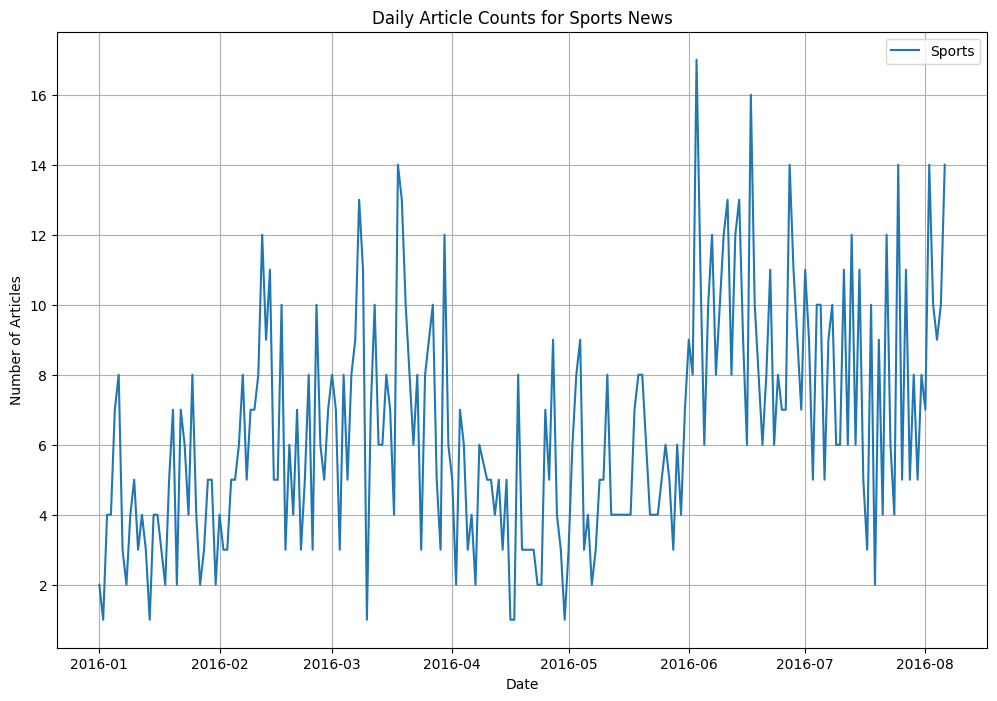

In [17]:
# Plot time series for 'business' news type
plt.figure(figsize=(12, 8))
plt.plot(business_counts.index, business_counts.values, label='Business')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.title('Daily Article Counts for Business News')
plt.legend()
plt.grid(True)
plt.show()

# Plot time series for 'sports' news type
plt.figure(figsize=(12, 8))
plt.plot(sports_counts.index, sports_counts.values, label='Sports')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.title('Daily Article Counts for Sports News')
plt.legend()
plt.grid(True)
plt.show()


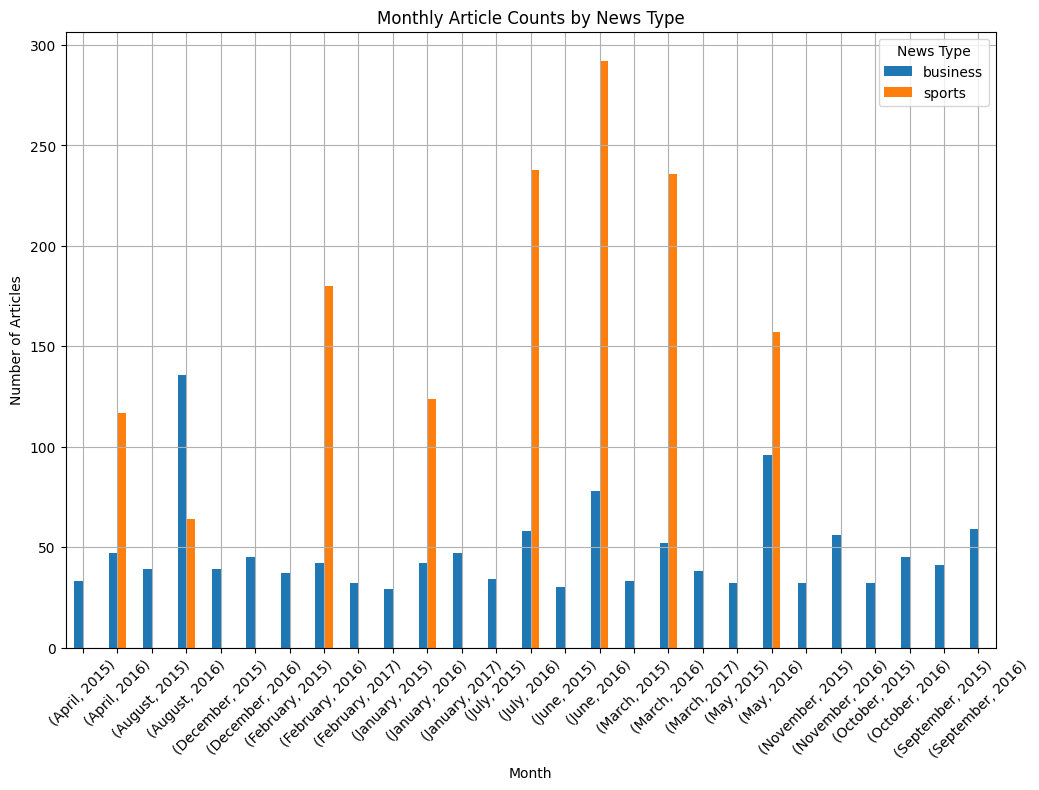

In [18]:
# Extract month and year from Date
df['Month'] = df['Date'].dt.strftime('%B')
df['Year'] = df['Date'].dt.year 

# Group by month and news type, count articles
monthly_counts = df.groupby(['Month','Year', 'NewsType']).size().unstack()
monthly_counts.plot(kind='bar', figsize=(12, 8))
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.title('Monthly Article Counts by News Type')
plt.xticks(rotation=45)
plt.legend(title='News Type')
plt.grid(True)
plt.show()


In [21]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)


In [22]:
#performing statistical findings
from scipy.stats import ttest_ind

# Perform t-test for article counts between business and sports
business_counts = df[df['NewsType'] == 'business']['Article'].value_counts()
sports_counts = df[df['NewsType'] == 'sports']['Article'].value_counts()

t_stat, p_value = ttest_ind(business_counts, sports_counts)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")



T-Statistic: 7.381830542954302, P-Value: 2.094641269468116e-13
